In [96]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc

\begin{align}
&\lambda_{d} = \frac{c}{1\;GHz\cdot \sqrt{\epsilon_{ef}}}&
&\lambda_{\text{transf}} = \frac{c}{1\;GHz\cdot \sqrt{\epsilon_{ef}}} \\
&d = 0.04\cdot \lambda_{d}&
&l_{\frac{\lambda}{4}} = \frac{\lambda_{transf}}{4} \\
\end{align}


In [97]:
eef_trans_d = 3.35669
lambda_z_transf_l1 = (3*1e8)/((1e9)*np.sqrt(eef_trans_d))
print(lambda_z_transf_l1)
l_trans_l1 = lambda_z_transf_l1 * 0.04
print(l_trans_l1)
eef_trans = 3.111
lambda_z_transf = (3*1e8)/((1e9)*np.sqrt(eef_trans))
print(lambda_z_transf)
l_trans = lambda_z_transf/4
print(l_trans)

0.16374409126177963
0.006549763650471186
0.17008705015002387
0.04252176253750597


In [98]:
Zo = 50
Z1 = 85.887
R = 100
L = 10*1e-9

Para el cálculo de la impendancia de entrada total se tien en cuenta lo siguiente:
\begin{align*}
&Z_{in1} = Z_o \frac{Z_L + j\cdot Z_o\;tan(\beta d)}{Z_o + j\cdot Z_L\;tan(\beta d)}&
&Z_{in2} = \left\{\begin{matrix}
Z_{1}\frac{Z_{in1}+j\cdot Z_{1}\;tan\left ( \beta l_{\frac{\lambda}{4}} \right )}{Z_{1}+j\cdot Z_{in1}\;tan\left ( \beta l_{\frac{\lambda}{4}} \right )} \;\;\;\; \text{si\;} \beta l_{\frac{\lambda}{4}} \neq \frac{\pi}{2} \text{\; es decir $f\neq1\;GHz$}\\
\\
\frac{Z_{1}^2}{Z_{in1}} \;\;\;\;\;\;\;\;\;\;\;\;\;\;\text{si\;} \beta l_{\frac{\lambda}{4}} \neq \frac{\pi}{2} \text{\; es decir $f=1\;GHz$}
\end{matrix}\right.&
\end{align*}
\begin{align*}
\beta = \frac{2\pi}{\frac{c}{f\cdot \sqrt{\cdot \epsilon_{ef}}}}
\end{align*}

In [99]:
def Zin1(f):
    ZL = R + 1J*(L*2*np.pi*f)
    beta = (2*np.pi) / ((3*1e8)/(f*np.sqrt(eef_trans_d)))
    return Zo*(ZL + 1J*(Zo*np.tan(beta*l_trans_l1))) / (Zo + 1J*(ZL*np.tan(beta*l_trans_l1)))
def Zin2(Zin1, f):
    beta = (2*np.pi*f) / ((3*1e8)/np.sqrt(eef_trans))
    print(np.tan(beta))
    return Z1 * (Zin1 + 1J*(Z1*np.tan(beta*l_trans))) / (Z1 + 1J*Zin1*np.tan(beta*l_trans))
print(Zin2(Zin1(1e9), 1e9))

-0.9468686543693465
(49.99948740639683+0.045212396433747845j)


In [100]:
Gamma = lambda Zl : (Zl-50) / (Zl+50)
ROE = lambda r: (1+abs(r)) / (1-abs(r))
RL = lambda r: -20*np.log(abs(r))

[0.61656005 0.67358483 0.73379123 ... 1.57460581 1.72429195 1.89632963]


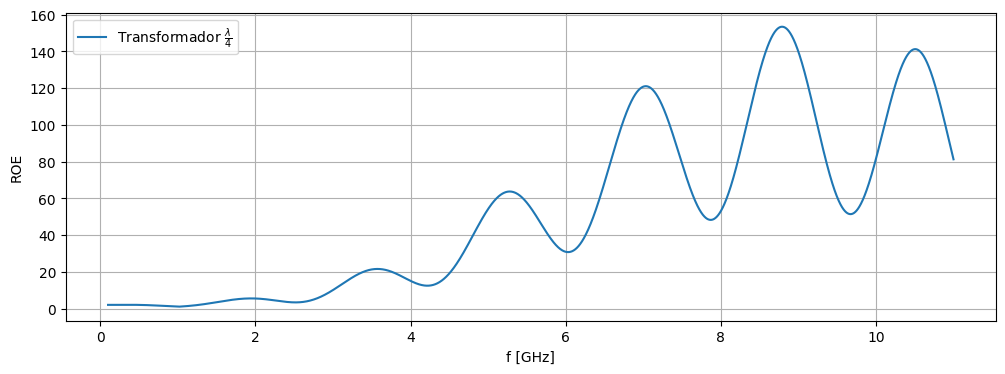

In [103]:
fig = plt.figure(figsize=(12,4))
x = np.linspace(100, 11000, 10000) * sc.mega
plt.grid()
plt.plot(x*1e-9, ROE(Gamma(Zin2(Zin1(x),x))), label=r"Transformador $\frac{\lambda}{4}$")
plt.xlabel("f [GHz]")
plt.ylabel("ROE")
plt.legend()
plt.show()